Ստորև գրված առաջադրանքները կատարելու վերջնաժամկետը **22.11.2024 09:30** է։ Առաջադրանքները կատարելուց հետո, պետք է

1. ներբեռնեք այս ֆայլը ձեր համակարգիչ (`File` $\to$ `Download .ipynb`)
2. վերնագրին ավելացնեք ձեր անուն, ազգանունը լատինատառ, օրինակ՝ *HW7_Clustering_NshanPotikyan.ipynb* ֆորմատով
3. վերբեռնեք ֆայլը e-learning համակարգով

**Ուշադրություն**․
1. Վերոնշյալ պայմաններին չբավարարելու դեպքում ձեր աշխատանքը չի գնահատվի։
2. Մեկ ⭐-ը մեկ միավոր է  



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

**Խնդիր 1.⭐⭐** Այս առաջադրանքի նպատակը K-Means ալգորիթմի աշխատանքը պատկերացնելն է։ Պահանջվում է
* մուտք գործել [այս կայք](https://www.naftaliharris.com/blog/visualizing-k-means-clustering)
* ընտրել ցանկացած կարգավորում, օրինակ՝
  >How to pick the initial centroids?
  >**Randomly**

  >What kind of data would you like?
  >**Uniform Points**

* «Add Centroid» կոճակի միջոցով ավելացնել ցանկալի քանակի նախնական կենտրոններ/միջիններ և սեղմել «GO!» կոճակը
* վերոնշյալ գործողությունից հետո կտեսնեք ալգորիթմի 1 քայլի արդյունքը, ալգորիթմի հետագա քայլերը տեսնելու համար պետք է հաջորդաբար սեղմել «Update Centroids» և «Reassign Points» կոճակները քանի դեռ միջինները թարմացվում են (պատկերի վրա նկատվում են փոփոխություններ)
* երբ միջինները դադարում են փոխվել, նշանակում է, որ ալգորիթմը զուգամիտել է։

Այժմ փորձիր խմբավորել «Smiley Face» տվյալները՝ ձեռքով նշելով նախնական միջինները․
  >How to pick the initial centroids?
  >**I'll Choose**

  >What kind of data would you like?
  >**Smiley Face**

**Հարց․** Հնարավո՞ր է այնպես ընտրել միջինները, որպեսզի ձախ աչքը լինի առանձին խումբ։


**Պատասխան․**  
Այո, հնարավոր է։ Եթե centroid-ներից մեկը նշենք ձախ աչքի վրա, իսկ մյուներն ընտրենք այնպես, որ շրջապատեն այդ centroid-ը։

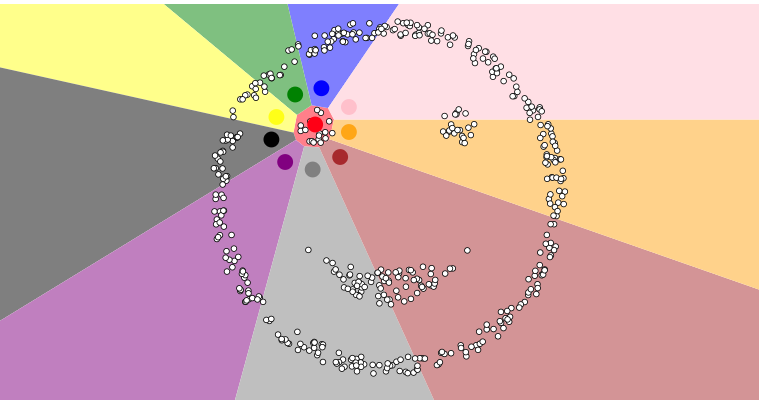

In [46]:
from IPython.display import Image
Image('Image1.png')

Ստորև պատկերված է վերջնական խմբավորումը։

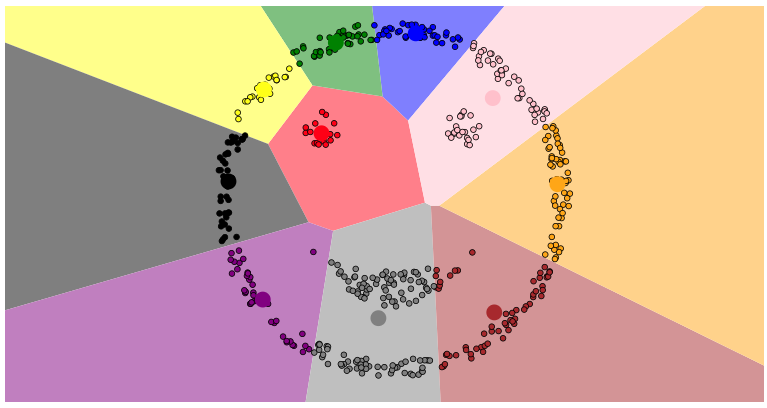

In [47]:
Image('Image2.png')

**Խնդիր 2.⭐⭐⭐** Տրված է 9 կետ երկչափ տարածությունից։ Պահանջվում է օգտագործել [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) ալգորիթմը նշված տվյալները ըստ 2, 3 և 4 խմբերի խմբավորելու համար։ Ալգորիթմի կիրառման կոդը ստանալու համար տե՛ս [այստեղի](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) օրինակը («Examples» բաժնում):

In [4]:
data = pd.DataFrame(
    {'ID':['P1','P2','P3','P4','P5','P6','P7','P8','P9'],
    'x':[0,1,4,2,0,1,3,7,6],
    'y':[1,1,0,3,5,6,6,4,8]})
data

,ID,x,y
0,P1,0,1
1,P2,1,1
2,P3,4,0
3,P4,2,3
4,P5,0,5
5,P6,1,6
6,P7,3,6
7,P8,7,4
8,P9,6,8


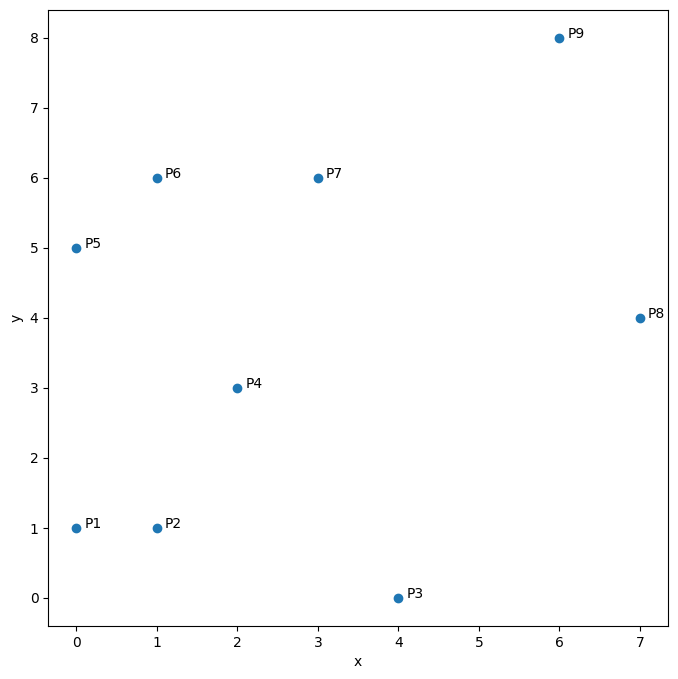

In [5]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')

# adding text next to the points
for i, label in enumerate(data['ID']):
    x = data['x'][i]+0.1
    y = data['y'][i]
    plt.annotate(label,(x,y))

In [28]:
def plot_data(X, model):
  """
  Helper function to plot the data points
  in the toy dataset and also plots the centroids
  using the fitted model
  """
  plt.figure(figsize=(8, 6))
  for i in range(len(model.cluster_centers_)):
    plt.scatter(data.loc[model.labels_ == i, 'x'],
             data.loc[model.labels_ == i, 'y'],
             marker='o' , label=f'{i}')
    plt.plot(model.cluster_centers_[i][0],
             model.cluster_centers_[i][1],
             marker='*', markersize=12)

  # adding text next to the points
  for i, label in enumerate(data['ID']):
    x = data['x'][i]+0.1
    y = data['y'][i]
    plt.annotate(label,(x,y))

  plt.legend()
  plt.show()

k-ի յուրաքանչյուր արժեքի համար {2, 3, 4} աշխատեցնել ալգորիթմը մի քանի անգամ (``init`` պարամետրի արժեքը դնելով 'random'), նկարել արդյունքները և մեկնաբանել դրանք:

Ըստ 2 խմբի խմբավորում


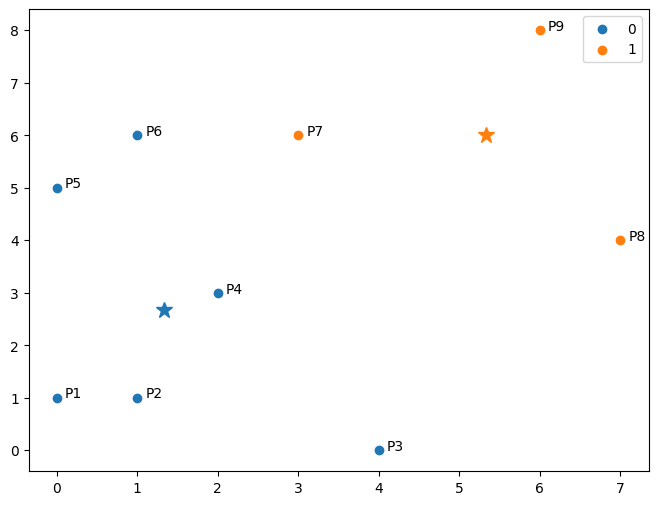

Ըստ 3 խմբի խմբավորում


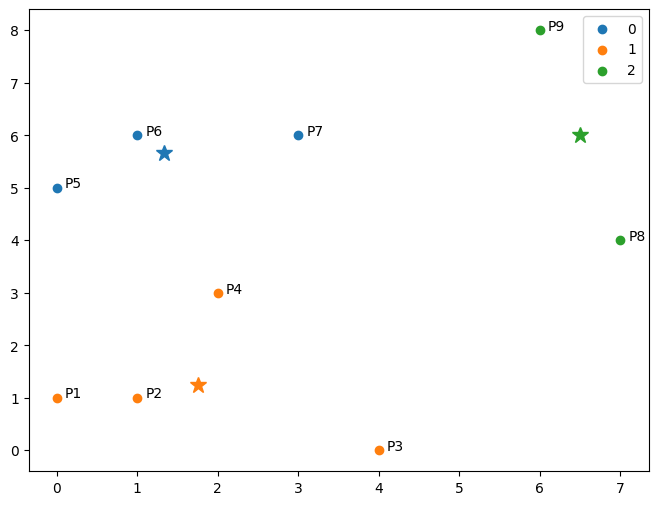

Ըստ 4 խմբի խմբավորում


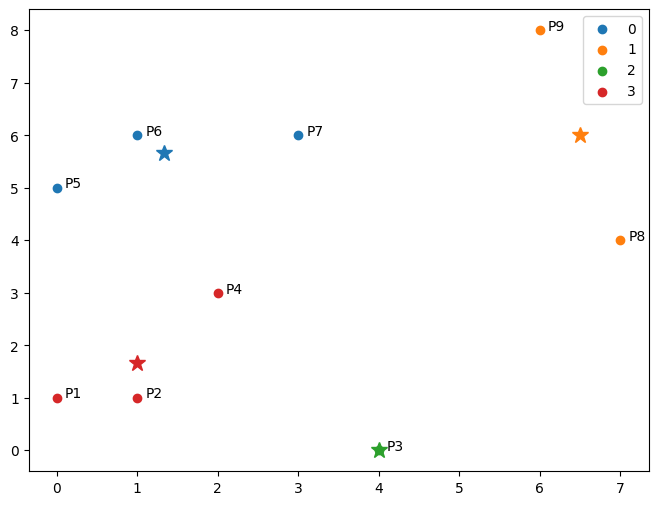

In [33]:
# Այստեղ կարող է լինել ձեր կոդը
from sklearn.cluster import KMeans

for k in range(2, 5):
  print(f'Ըստ {k} խմբի խմբավորում')
  kmeans = KMeans(n_clusters=k, n_init=50, init='random').fit(data[['x', 'y']])
  plot_data(data[['x', 'y']], kmeans)

**Պատասխան․**  
K-Means ալգորիթմը օգտագործելիս centroid-ները պատահականորեն (init='random') ենք ընտրում (centroid-ները մոր կետերից տարբեր կարող են լինել) և յուրաքանչյուր k-ի համար ալգորիթմն աշխատեցնում ենք 50 անգամ (n_init=50)։   

* k = 2 դեպքում ստանում ենք հետևյալ երկու խմբերը  
  - P1, P2, P3, P4, P5, P6,
  - P7, P8, P9  
   
  սակայն կարող ենք նկատել որ  P7-ը ավելի մոտ է P4-ին և P6-ին, քան P8-ին և P9-ին


* k = 3 դեպքում ստացվող խմբերը հետևյալն են՝

  - P1, P2, P3, P4
  - P5, P6, P7
  - P8, P9


* k = 4 դեպքում P3 կետը հանդես է գալիս որպես առանձին խումբ․

  - P1, P2, P4
  - P3
  - P5, P6, P7
  - P8, P9  

  Մեկ էլեմենտանոց խմբի առկայությունը այս խմբավորումը դարձնում է պակաս իմաստալից։   

Այսպիսով, այս տվյալների համար k-ի օպտիմալ արժեք կարող է լինել 2-ը կամ 3-ը։

**Խնդիր 3. ⭐⭐⭐⭐** Վերոնշյալ տվյալների վրա պահանջվում է իրականացնել հիերարխիկ խմբավորում (hierarchical clustering) առանց կոդի/ծրագրի։ Յուրաքանյուր միացում անելիս պետք է նշել միացվող տվյալների/խմբերի ID-երը և դրանց միջև եղած էվկլիդյան հեռավորությունը։ Խմբերը միացնել ``single linkage`` եղանակով։

Ինչ֊որ դեպքերում հնարավոր է լինեն նույն հեռավորությամբ մի քանի հավանական միացումներ, նման դեպքերում կարելի է պատահականորեն ընտրել դրանցից մեկը։

Օրինակ՝ առաջին 3 խմբերը կստացվեն այսպես․

$$[P1] + [P2] \ \rightarrow \   d=\sqrt{(0-1)^2+(1-1)^2}=\sqrt{1}=1$$
$$[P5] + [P6] \ \rightarrow \   d=\sqrt{(0-1)^2+(5-6)^2}=\sqrt{2} \approx 1.41$$
$$[P5,P6] + [P7] \ \rightarrow \   d=\sqrt{(1-3)^2+(6-6)^2}=\sqrt{4} = 2$$

Շարունակել խմբավորումը ստորև վանդակում։



**Պատասխան․**

$$[P1, P2] + [P4] \ \rightarrow \   d=\sqrt{(1-2)^2+(1-3)^2}=\sqrt{5} \approx 2.24$$
$$[P1, P2, P4] + [P5, P6, P7] \ \rightarrow \   d=\sqrt{(2-0)^2+(3-5)^2}=\sqrt{8} \approx 2,83$$
$$[P1, P2, P4, P5, P6, P7] + [P3] \ \rightarrow \   d=\sqrt{(4-1)^2+(0-1)^2}=\sqrt{10} \approx 3.16$$
$$[P1, P2, P3, P4, P5, P6, P7] + [P9] \ \rightarrow \   d=\sqrt{(6-3)^2+(8-6)^2}=\sqrt{13} \approx 3.61$$
$$[P1, P2, P3, P4, P5, P6, P7, P9] + [P8] \ \rightarrow \   d=\sqrt{(6-7)^2+(8-4)^2}=\sqrt{17} \approx 4.12$$


Կատարել նույնը օգտագործելով խմբերի միացման ``complete linkage`` եղանակը։ Այս դեպքում առաջին 3 խմբերը կլինեն․

$$[P1] + [P2] \ \rightarrow \   d=\sqrt{(0-1)^2+(1-1)^2}=\sqrt{1}=1$$
$$[P5] + [P6] \ \rightarrow \   d=\sqrt{(0-1)^2+(5-6)^2}=\sqrt{2} \approx 1.41$$
$$[P2,P1] + [P4] \ \rightarrow \   d=\sqrt{(0-2)^2+(1-3)^2}=\sqrt{8} \approx 2.83$$

Շարունակել խմբավորումը ստորև վանդակում։


**Պատասխան․**
$$[P5,P6] + [P7] \ \rightarrow \   d=\sqrt{(0-3)^2+(5-6)^2}=\sqrt{10} \approx 3.16$$
$$[P1, P2, P4] + [P3] \ \rightarrow \   d=\sqrt{(4-0)^2+(0-1)^2}=\sqrt{17} \approx 4.12$$
$$[P8] + [P9] \ \rightarrow \   d=\sqrt{(7-6)^2+(4-8)^2}=\sqrt{17} \approx 4.12$$
$$[P1, P2, P3, P4] + [P5, P6, P7] \ \rightarrow \   d=\sqrt{(4-1)^2+(0-6)^2}=\sqrt{45} \approx 6,71$$
$$[P1, P2, P3, P4, P5, P6, P7] + [P8, P9]\ \rightarrow \   d=\sqrt{(0-6)^2+(1-8)^2}=\sqrt{85} \approx 9,22$$


**Խնդիր 4.⭐⭐** Ստորև գրված կոդը աշխատացնելով կարելի է տեսնել **Խնդիր 3**-ում ստացվող խմբավորումների ծառերը (dendrogram)։ Այս խնդրի համար պահանջվում է
1. single linkage մոտեցումով գտած խմբերում գտնել այնպիսի ենթախումբ, որ complete linkage եղանակով գտած ենթախմբերից ոչ մեկը բաղկացած չլինի նույն տվյալներից
2. complete linkage մոտեցումով գտած խմբերում գտնել այնպիսի ենթախումբ, որ single linkage եղանակով գտած ենթախմբերից ոչ մեկը բաղկացած չլինի նույն տվյալներից

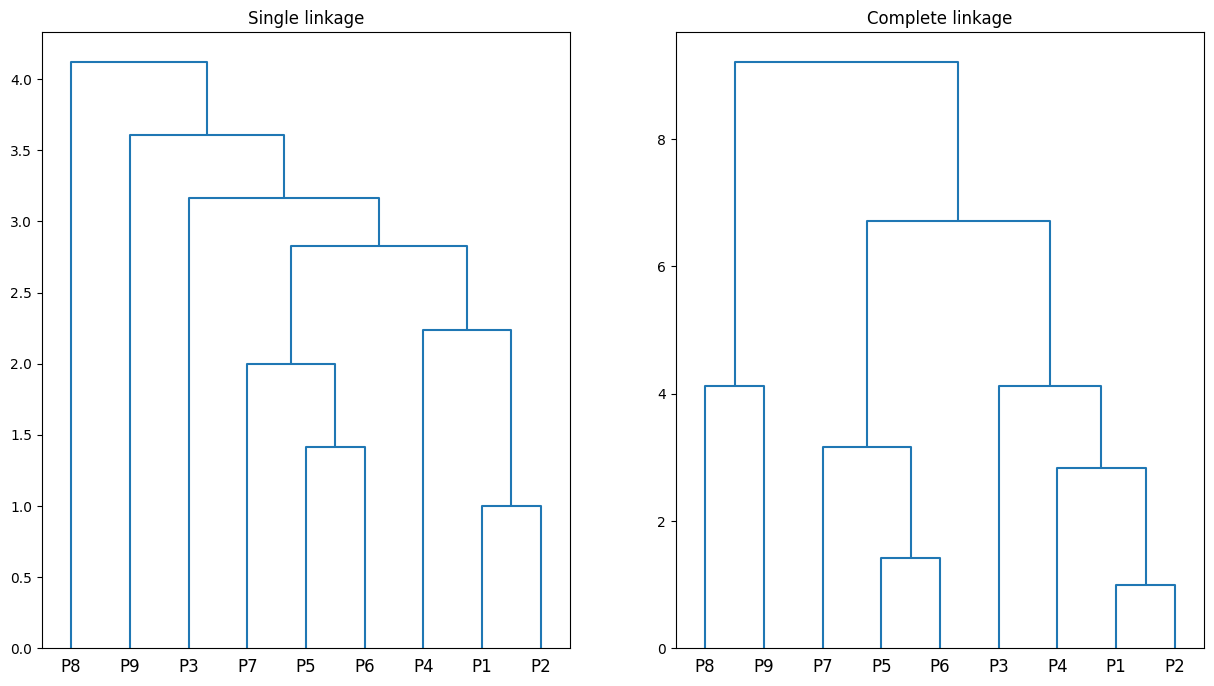

In [32]:
from scipy.cluster import hierarchy
plt.rcParams['figure.figsize'] = [15, 8]

single = hierarchy.linkage(data[['x','y']], 'single')
plt.subplot(1,2,1)
plt.title('Single linkage')
single_dm = hierarchy.dendrogram(single, labels=data.ID.tolist(), color_threshold=0)

complete = hierarchy.linkage(data[['x','y']], 'complete')
plt.subplot(1,2,2)
plt.title('Complete linkage')
complete_dm = hierarchy.dendrogram(complete, labels=data.ID.tolist(), color_threshold=0)

plt.show()

**Պատասխան․**

1. [P1,P2,P4,P5,P6,P7]  single linkage մոտեցումով գտած խումբ է և complete linkage եղանակով գտած ենթախմբերից ոչ մեկը բաղկացած չէ այս տվյալներից։
2. [P1, P2, P3, P4] complete linkage մոտեցումով գտած խումբ է և single linkage եղանակով գտած ենթախմբերից ոչ մեկը բաղկացած չէ այս տվյալներից։